In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#用于整数标签换转为独热编码

In [20]:
(X_train,y_train),(x_test,y_test) = mnist.load_data()

In [21]:
X_train #包含的就是图像

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [22]:
#60000张图像 都是28*28的像素大小
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

5


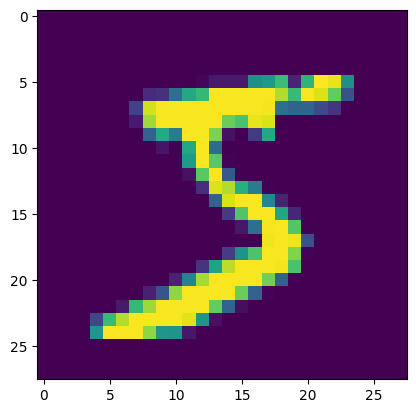

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])

In [24]:
#数据预处理
X_train = X_train / 255.0 #将所有的像素点 归一化到【0，1】
x_test = x_test / 255.0 #将所有的像素点 归一化到【0,1】

In [25]:
# 处理标签 60000个 单独的数字
# 要使用独热编码:
# 在分类任务中  模型最后一层输出 如果是多分类 那么就是softmax激活函数 输出多个神经元 每个神经元对应每个类别的概率
# 避免模型误解 类别数值大小关系
y_train = to_categorical(y_train,10) 
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:
y_test = to_categorical(y_test,10)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
#构建神经网络模型
#中括号包裹 架构
model = Sequential([
    #输入数据的特征内容
    Input(shape=(28,28)),
    #将输入的图片进行平铺 784个特征 一维数据
    Flatten(),
    #进入到隐藏层 神经元的个数 一般是64 128 256 512
    #需要给隐藏层加入激活函数
    Dense(128,activation='relu'),
    #一般神经网络隐藏层是1-5层
    Dense(64,activation='relu'),

    #输出层---全连接层 输出的应该有几个神经元？10
    Dense(10,activation='softmax')
])

In [28]:
#查看模型结构
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# 神经网络 要先进行编译操作
model.compile(
    optimizer='adam',#优化的梯度算法
    #损失函数计算的是什么内容？
    #对于分类而言: categorical_crossentropy
    loss='categorical_crossentropy', #分类:损失函数的计算方法
    #评估指标 accuracy
    metrics=['accuracy']
)

In [30]:
#训练模型
history = model.fit(
    X_train,
    y_train,
    epochs=10,#训练的次数
    batch_size=32, #每次训练32张图片
    validation_split=0.2 #从训练集拆分20%的数据进行验证
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9229 - loss: 0.2631 - val_accuracy: 0.9517 - val_loss: 0.1609
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9658 - loss: 0.1125 - val_accuracy: 0.9674 - val_loss: 0.1104
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9750 - loss: 0.0791 - val_accuracy: 0.9688 - val_loss: 0.1076
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0578 - val_accuracy: 0.9666 - val_loss: 0.1132
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0457 - val_accuracy: 0.9745 - val_loss: 0.0952
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9747 - val_loss: 0.1027
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9906 - loss: 0.0287 - val_accuracy: 0.9747 - val_loss: 0.1078
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9911 - loss: 0.0262 -

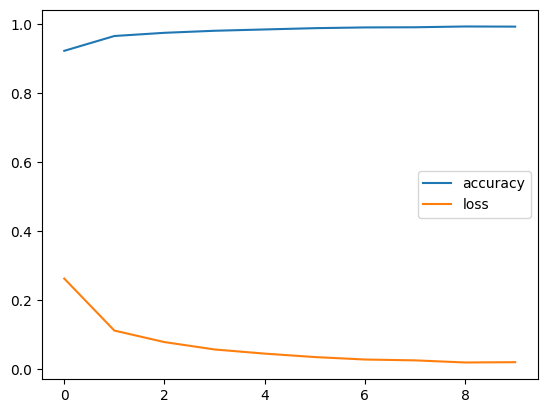

In [31]:
#将数据可视化
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.legend()#让图例展示出来
plt.show()

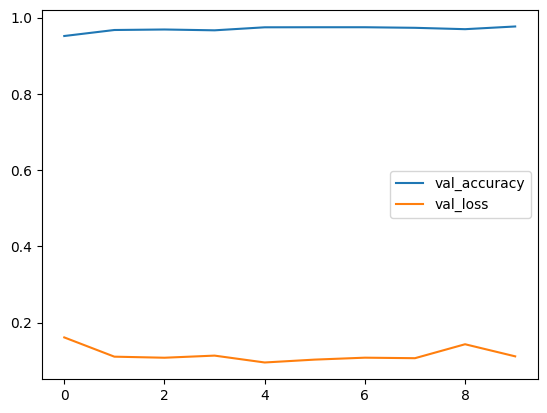

In [33]:
#将数据可视化
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [34]:
#模型评估
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print('测试的损失:',test_loss)
print('测试的准确率:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9747 - loss: 0.1105
测试的损失: 0.11053208261728287
测试的准确率: 0.9746999740600586
